## Artigo - Journal of Quantitative Spectroscopy (JQS)

#### - Ao explicar a implementação do modelo SLW-1 ele diz que nesses estudo irá explorar vários métodos de se encontrar os parâmetros k_1 e a_1
#### - Os métodos explorados são: k_p - epsilon; epsilon - epsilon; F_1 - F_2 (fluxo radioativo); e Q_1 - Q_2 (fluxo divergente)

In [1]:
# Bibliotecas e importações necessarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from scipy.integrate import quad
from scipy.special import expn

## Case 1 
#### As particularidades desse exemplo são:
#### - O tamanho da malha é L = 1m
#### - T = 1500k em toda a malha e T_0 = 1200k e T_l = 600k nas paredes
#### - As paredes são cinzas, e = 0.6
#### - Concentrações molares Y_H2O = 0.5
#### - Para chute em "Q_1 - Q_2", L_1 = 2m e L_2 = 0.5m, x_1 = 1m e x_2 = 0.5m

In [2]:
#####################################################################################################

## Case 2
#### É introduzido a explicação do meio não isotérmico e meios não homogêneos. Após isso, as particularidades desse exemplo são:
#### - O meio é não-isotermico, com T(x) = 1000 - 250.cos(pi.x/2) em toda a malha e T_0 = 1250k e T_l = 750k nas paredes
#### - As paredes são negras, e = 1
#### - Concentração molar uniforme Y_H2O = 0.1
#### - Não é dito o tamanho da malha, mas na figura do resultado ele é L = 2m
#### - Não é dito qual método se utilizou para encontrar "k" e "a"

In [19]:
# Dados
DirCase2_EpsEps = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/Git/IC_Radiation_Transfer/Codes/3°Version/Results/Simulation_solovjovJQSRT2011_Subcase2_epsilon-epsilon.csv'
DirCase2_FF = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/Git/IC_Radiation_Transfer/Codes/3°Version/Results/Simulation_solovjovJQSRT2011_Subcase2_F-F.csv'
DirCase2_SimuArt = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/Git/IC_Radiation_Transfer/Analysis/JournalOfQuantitativeSpectroscopy/Case2/SimulationCase2_Article.csv'

# Carrega-los
DataCase2_EpsEps = pd.read_csv(DirCase2_EpsEps, skiprows=2, header=None)
DataCase2_FF = pd.read_csv(DirCase2_FF, skiprows=2, header=None)
DataCase2_SimuArt = pd.read_csv(DirCase2_SimuArt, skiprows=2, header=None)

# Nome das colunas
DataCase2_EpsEps.columns = ['x', 'T', 'xh2o', 'S_LBL', 'S_SLW', 'S_SLW1', 'q_LBL', 'q_SLW', 'q_SLW1']
DataCase2_FF.columns = ['x', 'T', 'xh2o', 'S_LBL', 'S_SLW', 'S_SLW1', 'q_LBL', 'q_SLW', 'q_SLW1']
DataCase2_SimuArt.columns = ['x', 'T', 'xh2o', 'S', 'qx', 'X_SLW1', 'Ss_SLW1', 'X_SLW', 'Ss_SLW']

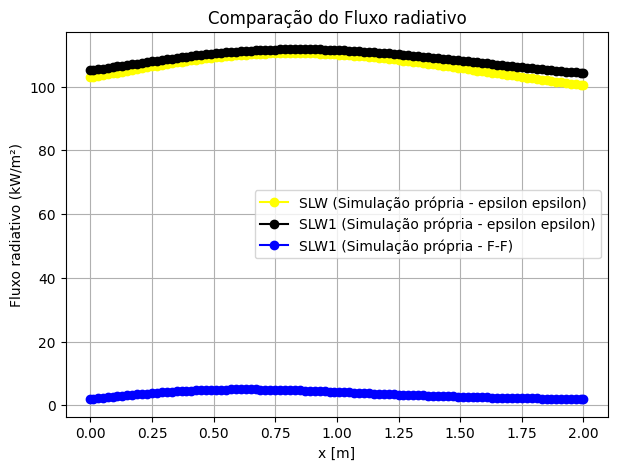

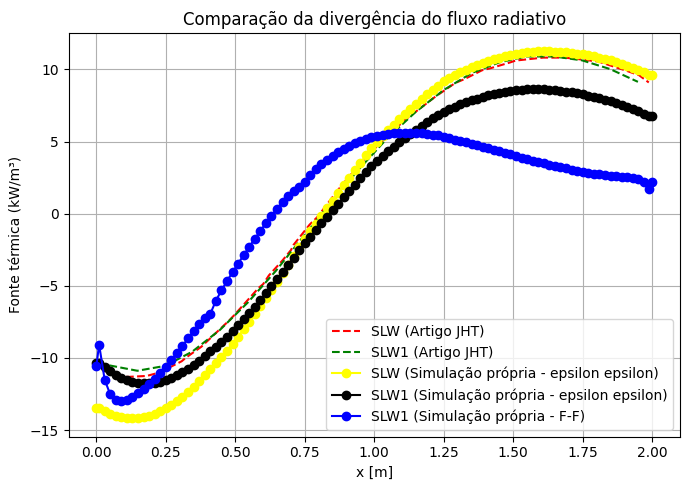

In [20]:
# Analises
plt.figure(figsize=(7, 5))
#plt.plot(DataCase2_SimuArt['X_SLW'], DataCase2_SimuArt['Ss_SLW'], '--', label='SLW (Artigo JHT)', color='red')
#plt.plot(DataCase2_SimuArt['X_SLW1'], DataCase2_SimuArt['Ss_SLW1'], '--', label='SLW1 (Artigo JHT)', color='green')
plt.plot(DataCase2_EpsEps['x'], DataCase2_EpsEps['q_SLW'], '-o', label='SLW (Simulação própria - epsilon epsilon)', color='yellow')
plt.plot(DataCase2_EpsEps['x'], DataCase2_EpsEps['q_SLW1'], '-o', label='SLW1 (Simulação própria - epsilon epsilon)', color='black')
plt.plot(DataCase2_FF['x'], DataCase2_FF['q_SLW1'], '-o', label='SLW1 (Simulação própria - F-F)', color='blue')
plt.xlabel('x [m]')
plt.ylabel('Fluxo radiativo (kW/m²)')
plt.title('Comparação do Fluxo radiativo')
plt.legend()
plt.grid(True)

plt.figure(figsize=(7, 5))
plt.plot(DataCase2_SimuArt['X_SLW'], DataCase2_SimuArt['Ss_SLW'], '--', label='SLW (Artigo JHT)', color='red')
plt.plot(DataCase2_SimuArt['X_SLW1'], DataCase2_SimuArt['Ss_SLW1'], '--', label='SLW1 (Artigo JHT)', color='green')
plt.plot(DataCase2_EpsEps['x'], DataCase2_EpsEps['S_SLW'], '-o', label='SLW (Simulação própria - epsilon epsilon)', color='yellow')
plt.plot(DataCase2_EpsEps['x'], DataCase2_EpsEps['S_SLW1'], '-o', label='SLW1 (Simulação própria - epsilon epsilon)', color='black')
plt.plot(DataCase2_FF['x'], DataCase2_FF['S_SLW1'], '-o', label='SLW1 (Simulação própria - F-F)', color='blue')
plt.xlabel('x [m]')
plt.ylabel('Fonte térmica (kW/m³)')
plt.title('Comparação da divergência do fluxo radiativo')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Case 3
#### 

In [4]:
# Dados
DirCase3_EpsEps = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/Git/IC_Radiation_Transfer/Codes/3°Version/Results/Simulation_solovjovJQSRT2011_Subcase3_epsilon-epsilon.csv'
DirCase3_FF = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/Git/IC_Radiation_Transfer/Codes/3°Version/Results/Simulation_solovjovJQSRT2011_Subcase3_F-F.csv'
DirCase3_QQ = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/Git/IC_Radiation_Transfer/Codes/3°Version/Results/Simulation_solovjovJQSRT2011_Subcase3_Q-Q.csv'
DirCase3_SimuArt = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/Git/IC_Radiation_Transfer/Analysis/JournalOfQuantitativeSpectroscopy/Case3/SimulationCase3_Article.csv'

# Carrega-los
DataCase3_EpsEps = pd.read_csv(DirCase3_EpsEps, skiprows=2, header=None)
DataCase3_FF = pd.read_csv(DirCase3_FF, skiprows=2, header=None)
DataCase3_QQ = pd.read_csv(DirCase3_QQ, skiprows=2, header=None)
DataCase3_SimuArt = pd.read_csv(DirCase3_SimuArt, skiprows=2, header=None)

# Nome das colunas
DataCase3_EpsEps.columns = ['x', 'T', 'xh2o', 'S_LBL', 'S_SLW', 'S_SLW1', 'q_LBL', 'q_SLW', 'q_SLW1']
DataCase3_FF.columns = ['x', 'T', 'xh2o', 'S_LBL', 'S_SLW', 'S_SLW1', 'q_LBL', 'q_SLW', 'q_SLW1']
DataCase3_QQ.columns = ['x', 'T', 'xh2o', 'S_LBL', 'S_SLW', 'S_SLW1', 'q_LBL', 'q_SLW', 'q_SLW1']
DataCase3_SimuArt.columns = ['x', 'T', 'xh2o', 'S', 'qx', 'X_SLW1', 'Ss_SLW1', 'X_LBL', 'Ss_LBL']

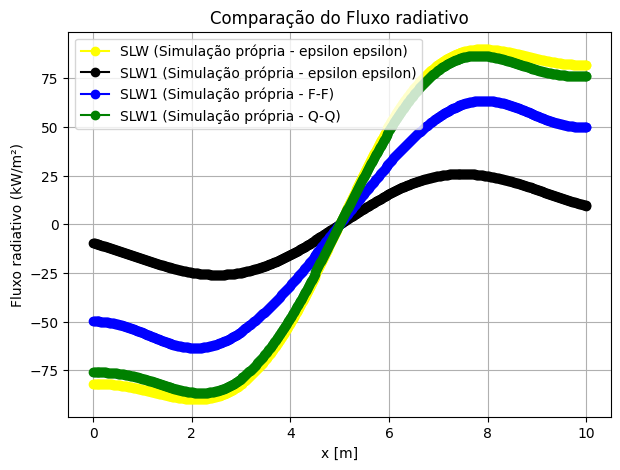

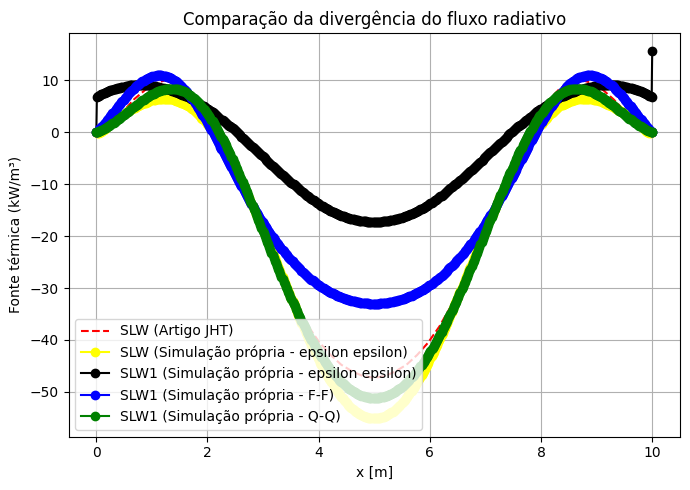

In [5]:
# Analises
plt.figure(figsize=(7, 5))
#plt.plot(DataCase3_SimuArt['Xq_SLW'], DataCase3_SimuArt['Q_SLW'], '--', label='SLW (Artigo JHT)', color='red')
#plt.plot(DataCase3_SimuArt['Xq_SLW1'], DataCase3_SimuArt['Q_SLW1'], '--', label='SLW1 (Artigo JHT)', color='green')
plt.plot(DataCase3_EpsEps['x'], DataCase3_EpsEps['q_SLW'], '-o', label='SLW (Simulação própria - epsilon epsilon)', color='yellow')
plt.plot(DataCase3_EpsEps['x'], DataCase3_EpsEps['q_SLW1'], '-o', label='SLW1 (Simulação própria - epsilon epsilon)', color='black')
plt.plot(DataCase3_FF['x'], DataCase3_FF['q_SLW1'], '-o', label='SLW1 (Simulação própria - F-F)', color='blue')
plt.plot(DataCase3_QQ['x'], DataCase3_QQ['q_SLW1'], '-o', label='SLW1 (Simulação própria - Q-Q)', color='green')
plt.xlabel('x [m]')
plt.ylabel('Fluxo radiativo (kW/m²)')
plt.title('Comparação do Fluxo radiativo')
plt.legend()
plt.grid(True)

plt.figure(figsize=(7, 5))
plt.plot(DataCase3_SimuArt['X_SLW1'], DataCase3_SimuArt['Ss_SLW1'], '--', label='SLW (Artigo JHT)', color='red')
plt.plot(DataCase3_EpsEps['x'], DataCase3_EpsEps['S_SLW'], '-o', label='SLW (Simulação própria - epsilon epsilon)', color='yellow')
plt.plot(DataCase3_EpsEps['x'], DataCase3_EpsEps['S_SLW1'], '-o', label='SLW1 (Simulação própria - epsilon epsilon)', color='black')
plt.plot(DataCase3_FF['x'], DataCase3_FF['S_SLW1'], '-o', label='SLW1 (Simulação própria - F-F)', color='blue')
plt.plot(DataCase3_QQ['x'], DataCase3_QQ['S_SLW1'], '-o', label='SLW1 (Simulação própria - Q-Q)', color='green')
plt.xlabel('x [m]')
plt.ylabel('Fonte térmica (kW/m³)')
plt.title('Comparação da divergência do fluxo radiativo')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Simulando ferramentas
### Função exponencial integral

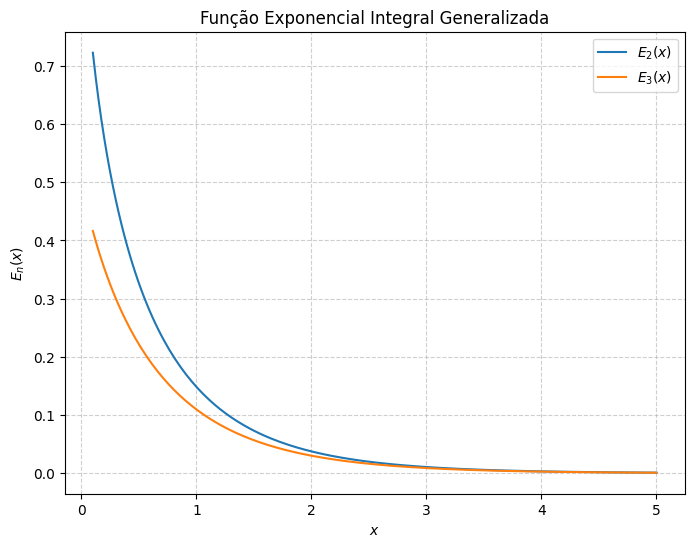

In [ ]:

# Definição manual da integral
def E_n_integral(n, x):
    integrand = lambda t: np.exp(-x * t) / (t**n)
    val, _ = quad(integrand, 1, np.inf)
    return val

# Escolha dos parâmetros
n_values = [2, 3]   
x_values = np.linspace(0.1, 5, 200)  # intervalo de x

plt.figure(figsize=(8,6))

for n in n_values:
    y = [E_n_integral(n, x) for x in x_values]  # cálculo via integral
    # y = [expn(n, x) for x in x_values]  # alternativa mais rápida (SciPy expn)
    plt.plot(x_values, y, label=f"$E_{n}(x)$")

plt.xlabel("$x$")
plt.ylabel("$E_n(x)$")
plt.title("Função Exponencial Integral Generalizada")
plt.legend()
plt.grid(True, ls="--", alpha=0.6)
plt.show()
